In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df=pd.read_csv("homeprices2.csv")
df

,town,area,price
0,Vijayawada,2600,550000
1,Vijayawada,3000,565000
2,Vijayawada,3200,610000
3,Vijayawada,3600,680000
4,Vijayawada,4000,725000
5,Guntur,2600,585000
6,Guntur,2800,615000
7,Guntur,3300,650000
8,Guntur,3600,710000
9,Gudiwada,2600,575000


In [2]:
df.shape

(13, 3)

In [3]:
df.columns

Index(['town', 'area', 'price'], dtype='object')

In [4]:
df.head()

,town,area,price
0,Vijayawada,2600,550000
1,Vijayawada,3000,565000
2,Vijayawada,3200,610000
3,Vijayawada,3600,680000
4,Vijayawada,4000,725000


In [5]:
locations=pd.unique(df["town"])
for location in locations:
   cond1=df["town"]=="location"
   print(df[cond1])

Empty DataFrame
Columns: [town, area, price]
Index: []
Empty DataFrame
Columns: [town, area, price]
Index: []
Empty DataFrame
Columns: [town, area, price]
Index: []


In [6]:
dummies=pd.get_dummies(df.town,dtype="int64")
print(dummies)

    Gudiwada  Guntur  Vijayawada
0          0       0           1
1          0       0           1
2          0       0           1
3          0       0           1
4          0       0           1
5          0       1           0
6          0       1           0
7          0       1           0
8          0       1           0
9          1       0           0
10         1       0           0
11         1       0           0
12         1       0           0


In [7]:
dummies=pd.get_dummies(df.town,dtype="int64")
print(dummies)
merged=pd.concat([df,dummies],axis="columns")
merged

    Gudiwada  Guntur  Vijayawada
0          0       0           1
1          0       0           1
2          0       0           1
3          0       0           1
4          0       0           1
5          0       1           0
6          0       1           0
7          0       1           0
8          0       1           0
9          1       0           0
10         1       0           0
11         1       0           0
12         1       0           0


,town,area,price,Gudiwada,Guntur,Vijayawada
0,Vijayawada,2600,550000,0,0,1
1,Vijayawada,3000,565000,0,0,1
2,Vijayawada,3200,610000,0,0,1
3,Vijayawada,3600,680000,0,0,1
4,Vijayawada,4000,725000,0,0,1
5,Guntur,2600,585000,0,1,0
6,Guntur,2800,615000,0,1,0
7,Guntur,3300,650000,0,1,0
8,Guntur,3600,710000,0,1,0
9,Gudiwada,2600,575000,1,0,0


In [8]:
final=merged.drop(["town"],axis="columns")
final

,area,price,Gudiwada,Guntur,Vijayawada
0,2600,550000,0,0,1
1,3000,565000,0,0,1
2,3200,610000,0,0,1
3,3600,680000,0,0,1
4,4000,725000,0,0,1
5,2600,585000,0,1,0
6,2800,615000,0,1,0
7,3300,650000,0,1,0
8,3600,710000,0,1,0
9,2600,575000,1,0,0


In [9]:
x=final.drop("price",axis="columns").values
x

array([[2600,    0,    0,    1],
       [3000,    0,    0,    1],
       [3200,    0,    0,    1],
       [3600,    0,    0,    1],
       [4000,    0,    0,    1],
       [2600,    0,    1,    0],
       [2800,    0,    1,    0],
       [3300,    0,    1,    0],
       [3600,    0,    1,    0],
       [2600,    1,    0,    0],
       [2900,    1,    0,    0],
       [3100,    1,    0,    0],
       [3600,    1,    0,    0]])

In [10]:
y=df.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [11]:
obj=LinearRegression()
obj.fit(x,y)
print(obj.predict([[3600,1,0,0]]))

[692293.59277574]


In [12]:
print(obj.predict(x))

[539709.73984091 590468.71640508 615848.20468716 666607.18125133
 717366.1578155  579723.71533005 605103.20361214 668551.92431735
 706621.15674047 565396.15136531 603465.38378844 628844.87207052
 692293.59277574]


In [13]:
print(obj.predict([[3400,0,0,1]]))

[641227.69296925]


In [14]:
print(obj.score(x,y)*100)

95.73929037221875


In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
df=pd.read_csv("homeprices2.csv")
df

,town,area,price
0,Vijayawada,2600,550000
1,Vijayawada,3000,565000
2,Vijayawada,3200,610000
3,Vijayawada,3600,680000
4,Vijayawada,4000,725000
5,Guntur,2600,585000
6,Guntur,2800,615000
7,Guntur,3300,650000
8,Guntur,3600,710000
9,Gudiwada,2600,575000


In [16]:
dummies=pd.get_dummies(df.town,dtype="int64")
dummies

,Gudiwada,Guntur,Vijayawada
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


In [17]:
merged=pd.concat([df,dummies],axis="columns")
merged

,town,area,price,Gudiwada,Guntur,Vijayawada
0,Vijayawada,2600,550000,0,0,1
1,Vijayawada,3000,565000,0,0,1
2,Vijayawada,3200,610000,0,0,1
3,Vijayawada,3600,680000,0,0,1
4,Vijayawada,4000,725000,0,0,1
5,Guntur,2600,585000,0,1,0
6,Guntur,2800,615000,0,1,0
7,Guntur,3300,650000,0,1,0
8,Guntur,3600,710000,0,1,0
9,Gudiwada,2600,575000,1,0,0


In [18]:
final=merged.drop(["town"],axis=1)
final

,area,price,Gudiwada,Guntur,Vijayawada
0,2600,550000,0,0,1
1,3000,565000,0,0,1
2,3200,610000,0,0,1
3,3600,680000,0,0,1
4,4000,725000,0,0,1
5,2600,585000,0,1,0
6,2800,615000,0,1,0
7,3300,650000,0,1,0
8,3600,710000,0,1,0
9,2600,575000,1,0,0


In [19]:
new_columns=["area","Gudiwada","Guntur","Vijayawada","price"]
final=final[new_columns]
final

,area,Gudiwada,Guntur,Vijayawada,price
0,2600,0,0,1,550000
1,3000,0,0,1,565000
2,3200,0,0,1,610000
3,3600,0,0,1,680000
4,4000,0,0,1,725000
5,2600,0,1,0,585000
6,2800,0,1,0,615000
7,3300,0,1,0,650000
8,3600,0,1,0,710000
9,2600,1,0,0,575000


In [20]:
x=final.drop("price",axis="columns").values
x

array([[2600,    0,    0,    1],
       [3000,    0,    0,    1],
       [3200,    0,    0,    1],
       [3600,    0,    0,    1],
       [4000,    0,    0,    1],
       [2600,    0,    1,    0],
       [2800,    0,    1,    0],
       [3300,    0,    1,    0],
       [3600,    0,    1,    0],
       [2600,    1,    0,    0],
       [2900,    1,    0,    0],
       [3100,    1,    0,    0],
       [3600,    1,    0,    0]])

In [21]:
y=df["price"].values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [22]:
obj=LinearRegression()
obj.fit(x,y)
print(obj.predict([[3600,1,0,0]]))

[692293.59277574]


In [23]:
print(obj.predict(x))

[539709.73984091 590468.71640508 615848.20468716 666607.18125133
 717366.1578155  579723.71533005 605103.20361214 668551.92431735
 706621.15674047 565396.15136531 603465.38378844 628844.87207052
 692293.59277574]


In [24]:
print(obj.score(x,y)*100)

95.73929037221875


In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df=pd.read_csv("homeprices2.csv")
df

,town,area,price
0,Vijayawada,2600,550000
1,Vijayawada,3000,565000
2,Vijayawada,3200,610000
3,Vijayawada,3600,680000
4,Vijayawada,4000,725000
5,Guntur,2600,585000
6,Guntur,2800,615000
7,Guntur,3300,650000
8,Guntur,3600,710000
9,Gudiwada,2600,575000


In [26]:
dummies=pd.get_dummies(df.town,dtype="int64")
dummies

,Gudiwada,Guntur,Vijayawada
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


In [27]:
merging=pd.concat([df,dummies],axis="columns")
merging

,town,area,price,Gudiwada,Guntur,Vijayawada
0,Vijayawada,2600,550000,0,0,1
1,Vijayawada,3000,565000,0,0,1
2,Vijayawada,3200,610000,0,0,1
3,Vijayawada,3600,680000,0,0,1
4,Vijayawada,4000,725000,0,0,1
5,Guntur,2600,585000,0,1,0
6,Guntur,2800,615000,0,1,0
7,Guntur,3300,650000,0,1,0
8,Guntur,3600,710000,0,1,0
9,Gudiwada,2600,575000,1,0,0


In [28]:
final=merging.drop("town",axis=1)
final

,area,price,Gudiwada,Guntur,Vijayawada
0,2600,550000,0,0,1
1,3000,565000,0,0,1
2,3200,610000,0,0,1
3,3600,680000,0,0,1
4,4000,725000,0,0,1
5,2600,585000,0,1,0
6,2800,615000,0,1,0
7,3300,650000,0,1,0
8,3600,710000,0,1,0
9,2600,575000,1,0,0


In [29]:
new_columns=["area","Gudiwada","Guntur","Vijayawada","price"]
final=final[new_columns]
final

,area,Gudiwada,Guntur,Vijayawada,price
0,2600,0,0,1,550000
1,3000,0,0,1,565000
2,3200,0,0,1,610000
3,3600,0,0,1,680000
4,4000,0,0,1,725000
5,2600,0,1,0,585000
6,2800,0,1,0,615000
7,3300,0,1,0,650000
8,3600,0,1,0,710000
9,2600,1,0,0,575000


In [30]:
x=final.drop("price",axis="columns").values
x

array([[2600,    0,    0,    1],
       [3000,    0,    0,    1],
       [3200,    0,    0,    1],
       [3600,    0,    0,    1],
       [4000,    0,    0,    1],
       [2600,    0,    1,    0],
       [2800,    0,    1,    0],
       [3300,    0,    1,    0],
       [3600,    0,    1,    0],
       [2600,    1,    0,    0],
       [2900,    1,    0,    0],
       [3100,    1,    0,    0],
       [3600,    1,    0,    0]])

In [31]:
y=df["price"].values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [32]:
obj=LinearRegression()
obj.fit(x,y)
print(obj.predict(x))

[539709.73984091 590468.71640508 615848.20468716 666607.18125133
 717366.1578155  579723.71533005 605103.20361214 668551.92431735
 706621.15674047 565396.15136531 603465.38378844 628844.87207052
 692293.59277574]


In [33]:
print(obj.score(x,y)*100)

95.73929037221875


In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df=pd.read_csv("homeprices2.csv")
df

,town,area,price
0,Vijayawada,2600,550000
1,Vijayawada,3000,565000
2,Vijayawada,3200,610000
3,Vijayawada,3600,680000
4,Vijayawada,4000,725000
5,Guntur,2600,585000
6,Guntur,2800,615000
7,Guntur,3300,650000
8,Guntur,3600,710000
9,Gudiwada,2600,575000


In [35]:
dummies=pd.get_dummies(df.town,dtype="int64")
dummies

,Gudiwada,Guntur,Vijayawada
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


In [36]:
merging=pd.concat([df,dummies],axis="columns")
merging

,town,area,price,Gudiwada,Guntur,Vijayawada
0,Vijayawada,2600,550000,0,0,1
1,Vijayawada,3000,565000,0,0,1
2,Vijayawada,3200,610000,0,0,1
3,Vijayawada,3600,680000,0,0,1
4,Vijayawada,4000,725000,0,0,1
5,Guntur,2600,585000,0,1,0
6,Guntur,2800,615000,0,1,0
7,Guntur,3300,650000,0,1,0
8,Guntur,3600,710000,0,1,0
9,Gudiwada,2600,575000,1,0,0


In [37]:
final=merging.drop("town",axis=1)
final

,area,price,Gudiwada,Guntur,Vijayawada
0,2600,550000,0,0,1
1,3000,565000,0,0,1
2,3200,610000,0,0,1
3,3600,680000,0,0,1
4,4000,725000,0,0,1
5,2600,585000,0,1,0
6,2800,615000,0,1,0
7,3300,650000,0,1,0
8,3600,710000,0,1,0
9,2600,575000,1,0,0


In [38]:
new_columns=["area","Gudiwada","Guntur","Vijayawada","price"]
final=final[new_columns]
final

,area,Gudiwada,Guntur,Vijayawada,price
0,2600,0,0,1,550000
1,3000,0,0,1,565000
2,3200,0,0,1,610000
3,3600,0,0,1,680000
4,4000,0,0,1,725000
5,2600,0,1,0,585000
6,2800,0,1,0,615000
7,3300,0,1,0,650000
8,3600,0,1,0,710000
9,2600,1,0,0,575000


In [39]:
x=final.drop("price",axis="columns").values
x


array([[2600,    0,    0,    1],
       [3000,    0,    0,    1],
       [3200,    0,    0,    1],
       [3600,    0,    0,    1],
       [4000,    0,    0,    1],
       [2600,    0,    1,    0],
       [2800,    0,    1,    0],
       [3300,    0,    1,    0],
       [3600,    0,    1,    0],
       [2600,    1,    0,    0],
       [2900,    1,    0,    0],
       [3100,    1,    0,    0],
       [3600,    1,    0,    0]])

In [40]:
y=final.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [41]:
obj=LinearRegression()
obj.fit(x,y)
print(obj.predict(x))

[539709.73984091 590468.71640508 615848.20468716 666607.18125133
 717366.1578155  579723.71533005 605103.20361214 668551.92431735
 706621.15674047 565396.15136531 603465.38378844 628844.87207052
 692293.59277574]


In [42]:
print(obj.score(x,y)*100)

95.73929037221875


In [43]:
import pandas as pd
import pickle
import joblib
from sklearn.linear_model import LinearRegression
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [44]:
x=df.drop("price",axis="columns").values
x

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]])

In [45]:
y=df["area"].values
y

array([2600, 3000, 3200, 3600, 4000])

In [46]:
obj=LinearRegression()
obj.fit(x,y)
with open("rajesh5.pkl","wb") as f1:
    
 pickle.dump(obj,f1)
 print("pickling is done")

pickling is done


In [47]:
with open("rajesh5.pkl","rb")as f2:
 obj=pickle.load(f2)
 print(obj.predict(x))
 print("unpickling is done")

[2600. 3000. 3200. 3600. 4000.]
unpickling is done


In [48]:
joblib.dump(obj,"obj_joblib")
print("its a saved")

its a saved


In [49]:
obj=joblib.load("obj_joblib")
print(obj.predict(x))

[2600. 3000. 3200. 3600. 4000.]


In [50]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
df=pd.read_csv("homeprices2.csv")
df

,town,area,price
0,Vijayawada,2600,550000
1,Vijayawada,3000,565000
2,Vijayawada,3200,610000
3,Vijayawada,3600,680000
4,Vijayawada,4000,725000
5,Guntur,2600,585000
6,Guntur,2800,615000
7,Guntur,3300,650000
8,Guntur,3600,710000
9,Gudiwada,2600,575000


In [51]:
obj=OneHotEncoder(sparse_output=False)
result=obj.fit_transform(df[["town"]])
result

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [52]:
dummies=pd.get_dummies(df["town"],dtype="int64")
dummies

,Gudiwada,Guntur,Vijayawada
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


In [53]:
merging=pd.concat([df,dummies],axis="columns")
merging

,town,area,price,Gudiwada,Guntur,Vijayawada
0,Vijayawada,2600,550000,0,0,1
1,Vijayawada,3000,565000,0,0,1
2,Vijayawada,3200,610000,0,0,1
3,Vijayawada,3600,680000,0,0,1
4,Vijayawada,4000,725000,0,0,1
5,Guntur,2600,585000,0,1,0
6,Guntur,2800,615000,0,1,0
7,Guntur,3300,650000,0,1,0
8,Guntur,3600,710000,0,1,0
9,Gudiwada,2600,575000,1,0,0


In [54]:
final=merging.drop("town",axis=1)
final

,area,price,Gudiwada,Guntur,Vijayawada
0,2600,550000,0,0,1
1,3000,565000,0,0,1
2,3200,610000,0,0,1
3,3600,680000,0,0,1
4,4000,725000,0,0,1
5,2600,585000,0,1,0
6,2800,615000,0,1,0
7,3300,650000,0,1,0
8,3600,710000,0,1,0
9,2600,575000,1,0,0


In [55]:
new_columns=["area","Gudiwada","Guntur","Vijayawada","price"]
final=final[new_columns]
final

,area,Gudiwada,Guntur,Vijayawada,price
0,2600,0,0,1,550000
1,3000,0,0,1,565000
2,3200,0,0,1,610000
3,3600,0,0,1,680000
4,4000,0,0,1,725000
5,2600,0,1,0,585000
6,2800,0,1,0,615000
7,3300,0,1,0,650000
8,3600,0,1,0,710000
9,2600,1,0,0,575000


In [56]:
x=final.drop("price",axis=1).values
x

array([[2600,    0,    0,    1],
       [3000,    0,    0,    1],
       [3200,    0,    0,    1],
       [3600,    0,    0,    1],
       [4000,    0,    0,    1],
       [2600,    0,    1,    0],
       [2800,    0,    1,    0],
       [3300,    0,    1,    0],
       [3600,    0,    1,    0],
       [2600,    1,    0,    0],
       [2900,    1,    0,    0],
       [3100,    1,    0,    0],
       [3600,    1,    0,    0]])

In [57]:
y=final.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [58]:
obj=LinearRegression()
obj.fit(x,y)
obj.predict([[3000,0,0,1]])

array([590468.71640508])

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
a={
    "names":["rajesh","maddi","today","tomorrow"],
    "values":["hello","world","ok","chintu"]
}
df=pd.DataFrame(a)
obj=LabelEncoder()
df["names_n"]=obj.fit_transform(df["names"])
df["values_n"]=obj.fit_transform(df["values"])
df

,names,values,names_n,values_n
0,rajesh,hello,1,1
1,maddi,world,0,3
2,today,ok,2,2
3,tomorrow,chintu,3,0


In [60]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
a={
    "x":[10,20,30,40,50],
     "y":[100,200,300,400,500]
}
df=pd.DataFrame(a)
obj=MinMaxScaler(feature_range=(0,1))
df[["x","y"]]=obj.fit_transform(df[["x","y"]])
df

,x,y
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [61]:
import pandas as pd
import numpy as np
a={
    "area":[123,456,789,999],
     "value":[2,3,4,200],
      "rate":[234,789,678,899]
}
df=pd.DataFrame(a)
cond1=df["value"]<7
df[cond1]

,area,value,rate
0,123,2,234
1,456,3,789
2,789,4,678


In [62]:
df["outliers"]=np.where(cond1,0,1)
df

,area,value,rate,outliers
0,123,2,234,0
1,456,3,789,0
2,789,4,678,0
3,999,200,899,1


In [63]:
import pandas as pd
from sklearn.impute import SimpleImputer
students = [
              [85, 'M', 'verygood'],
              [95, 'F', 'excellent'],
              [60, np.nan, 'good'],
              [np.nan, 'M', 'average'],
               [70, 'M', 'good'],
              [np.nan, np.nan, 'verygood'],
              [60, 'F', 'verygood'],
              [98, 'M', 'excellent']]
cols=["marks","gender","result"]
df=pd.DataFrame(students,columns=cols)
obj=SimpleImputer(strategy="most_frequent")
x=df[["marks"]].values
df[["marks"]]=obj.fit_transform(x)
df

,marks,gender,result
0,85.0,M,verygood
1,95.0,F,excellent
2,60.0,NaN,good
3,60.0,M,average
4,70.0,M,good
5,60.0,NaN,verygood
6,60.0,F,verygood
7,98.0,M,excellent


In [64]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
a=asarray([["rajesh"],["maddi"],["today"],["tomorrow"]])
obj=OrdinalEncoder()
result=obj.fit_transform(a)
result

array([[1.],
       [0.],
       [2.],
       [3.]])

In [65]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
a=asarray([["rajesh"],["reddy"],["maddi"],["today"]])
obj=OneHotEncoder(drop="first",sparse_output=False)
result=obj.fit_transform(a)
result

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
a=np.arange(10)
result=train_test_split(a,test_size=0.3)
result


[array([9, 4, 6, 8, 3, 1, 0]), array([2, 5, 7])]

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
a=np.arange(20)
X_train,X_test=train_test_split(a,test_size=0.4)
X_train

array([ 5, 15, 13, 11, 10,  8,  4, 18,  1,  2,  7,  9])

In [68]:
X_test

array([12,  0,  6, 16,  3, 17, 14, 19])

In [69]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [70]:
x=df.drop("price",axis="columns").values
x

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]])

In [71]:
y=df.price.values
y

array([550000, 565000, 610000, 680000, 725000])

In [72]:
obj=LinearRegression()
obj.fit(x,y)
print(obj.predict(x))

[533664.38356164 587979.45205479 615136.98630137 669452.05479452
 723767.12328767]


In [73]:
print(obj.score(x,y)*100)

95.84301138199486


In [74]:
result=pd.read_csv("areas.csv")
result

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [75]:
print(obj.predict(result))

[ 316404.10958904  384297.94520548  492928.08219178  661304.79452055
  740061.64383562  799808.21917808  926090.75342466  650441.78082192
  825607.87671233  492928.08219178 1402705.47945205 1348390.4109589
 1144708.90410959]


C:\Users\rajes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [76]:
df["new_value"]=result
df

,area,price,new_value
0,2600,550000,1000
1,3000,565000,1500
2,3200,610000,2300
3,3600,680000,3540
4,4000,725000,4120


In [77]:
x=df.drop("new_value",axis=1)
x

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [78]:
final=int(input(obj.predict(result)))
final

C:\Users\rajes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


[ 316404.10958904  384297.94520548  492928.08219178  661304.79452055
  740061.64383562  799808.21917808  926090.75342466  650441.78082192
  825607.87671233  492928.08219178 1402705.47945205 1348390.4109589
 1144708.90410959] 4000


4000

In [79]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [80]:
x=df.iloc[:,0:1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [81]:
y=df.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4)
X_train

array([[5.1],
       [4.9],
       [7.9],
       [4.5],
       [2.9],
       [3.7],
       [6.8],
       [3.2],
       [5.3],
       [9.5],
       [8.7],
       [3. ],
       [2.2],
       [3.9],
       [1.1],
       [4.1],
       [9.6],
       [9. ]])

In [83]:
X_test

array([[ 1.5],
       [ 3.2],
       [ 5.9],
       [ 2. ],
       [ 6. ],
       [10.3],
       [ 1.3],
       [ 4. ],
       [10.5],
       [ 4. ],
       [ 8.2],
       [ 7.1]])

In [84]:
Y_train

array([ 66029.,  67938., 101302.,  61111.,  56642.,  57189.,  91738.,
        64445.,  83088., 116969., 109431.,  60150.,  39891.,  63218.,
        39343.,  57081., 112635., 105582.])

In [85]:
Y_test

array([ 37731.,  54445.,  81363.,  43525.,  93940., 122391.,  46205.,
        55794., 121872.,  56957., 113812.,  98273.])

In [86]:
obj=LinearRegression()
obj.fit(X_train,Y_train)
print(obj.predict(X_test))

[ 40252.21236215  55891.27232879  80729.77933463  44851.93588175
  81649.72403855 121207.34630711  38412.32295431  63250.82996015
 123047.23571495  63250.82996015 101888.50752479  91769.11578167]


In [87]:
print(obj.score(X_test,Y_test)*100)

95.4754598868225


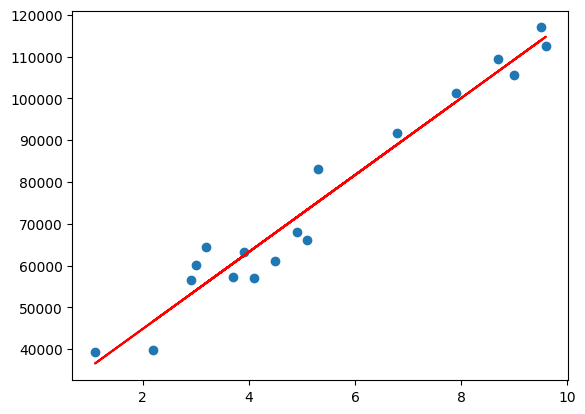

In [88]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,obj.predict(X_train),color="red")

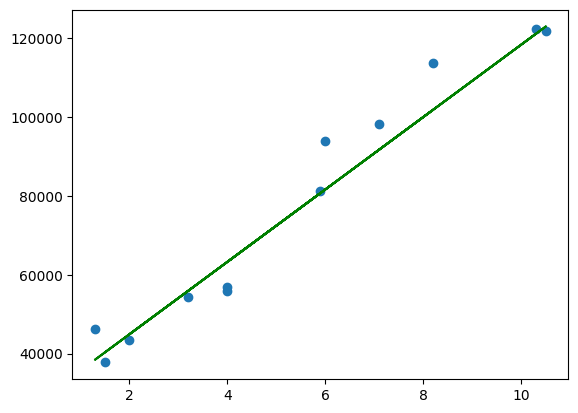

In [89]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,obj.predict(X_test),color="green")

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
df=pd.read_csv("homeprices1.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [91]:
x=df["bedrooms"].mean()
df["bedrooms"]=df["bedrooms"].fillna(x)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [92]:
import numpy as np
x=df.iloc[:,0:3].values
np.set_printoptions(suppress=True)
x

array([[2600. ,    3. ,   20. ],
       [3000. ,    4. ,   15. ],
       [3200. ,    4.2,   18. ],
       [3600. ,    3. ,   30. ],
       [4000. ,    5. ,    8. ],
       [4100. ,    6. ,    8. ]])

In [93]:
y=df.iloc[:,3].values
y

array([550000, 565000, 610000, 595000, 760000, 810000])

In [94]:
obj=LinearRegression()
obj.fit(x,y)
print(obj.predict([[4100,6,8]]))

[793062.69844975]


In [95]:
print(obj.predict(x))

[517680.56257679 601483.40843428 617541.31379815 597592.55691169
 762639.45982935 793062.69844975]


In [96]:
print(obj.score(x,y))

0.9540926625396438


In [97]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
df=pd.read_csv("poly_dataset.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [98]:
x=df.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [99]:
y=df.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [100]:
obj=PolynomialFeatures(degree=4)
X_poly=obj.fit_transform(x)
X_poly

array([[    1.,     1.,     1.,     1.,     1.],
       [    1.,     2.,     4.,     8.,    16.],
       [    1.,     3.,     9.,    27.,    81.],
       [    1.,     4.,    16.,    64.,   256.],
       [    1.,     5.,    25.,   125.,   625.],
       [    1.,     6.,    36.,   216.,  1296.],
       [    1.,     7.,    49.,   343.,  2401.],
       [    1.,     8.,    64.,   512.,  4096.],
       [    1.,     9.,    81.,   729.,  6561.],
       [    1.,    10.,   100.,  1000., 10000.]])

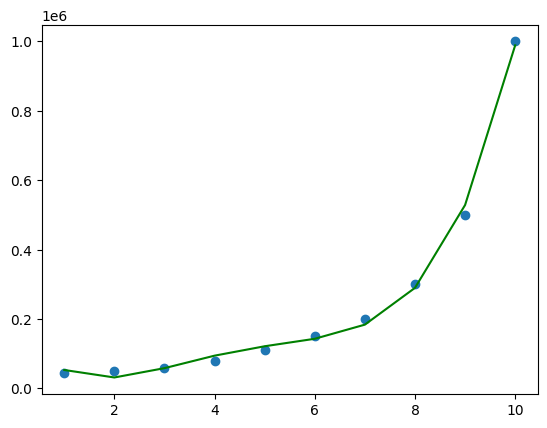

In [101]:
model=LinearRegression()
model.fit(X_poly,y)
plt.scatter(x,y)
plt.plot(x,model.predict(X_poly),color="green")

In [102]:
final=model.predict(obj.fit_transform(x))
final

array([ 53356.64335673,  31759.90675989,  58642.19114214,  94632.86713283,
       121724.94172492, 143275.05827504, 184003.49650348, 289994.17249416,
       528694.63869465, 988916.08391617])

In [103]:
import pickle
class Rajesh:
      def __init__(self,a,b,c):
           self.a=a
           self.b=b
           self.c=c
      def name(self):
           print("first value",self.a)
           print("second value",self.b)
           print("third value",self.c)
with open("rajesh6.pkl","wb") as f1:
 x=Rajesh(100,200,300)
 pickle.dump(x,f1)
 print("pickling is done")

pickling is done


In [104]:
with open("rajesh6.pkl","rb") as f2:
 obj=pickle.load(f2)
 obj.name()
 print("unpickling is done")
 

first value 100
second value 200
third value 300
unpickling is done


In [105]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [106]:
x=df.drop("price",axis="columns").values
x

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]])

In [107]:
y=df.price.values
y

array([550000, 565000, 610000, 680000, 725000])

In [108]:
model=LinearRegression()
model.fit(x,y)
with open("rajesh7.pkl","wb") as f1:
 pickle.dump(model,f1)
 print("pickling is done")

pickling is done


In [109]:
with open("rajesh7.pkl","rb") as f2:
 obj1=pickle.load(f2)
 print(obj1.predict(x))
 
 

[533664.38356164 587979.45205479 615136.98630137 669452.05479452
 723767.12328767]


In [110]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [111]:
x=df.drop("price",axis="columns").values
x


array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]])

In [112]:
y=df.price.values
y

array([550000, 565000, 610000, 680000, 725000])

In [113]:
obj=LinearRegression()
obj.fit(x,y)
joblib.dump(obj,"obj_dump")
print("pickling is done")

pickling is done


In [114]:
model=joblib.load("obj_dump")
print(model.predict(x))

[533664.38356164 587979.45205479 615136.98630137 669452.05479452
 723767.12328767]


In [115]:
import pandas as pd
x={
    "a":[230,450,890,6789,999],
     "b":[678,987,454,457,234]
}
df=pd.DataFrame(x)
r_value=df.corr()["b"]
r_value

a   -0.29151
b    1.00000
Name: b, dtype: float64

In [116]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df=pd.read_csv("homeprices2.csv")
df

,town,area,price
0,Vijayawada,2600,550000
1,Vijayawada,3000,565000
2,Vijayawada,3200,610000
3,Vijayawada,3600,680000
4,Vijayawada,4000,725000
5,Guntur,2600,585000
6,Guntur,2800,615000
7,Guntur,3300,650000
8,Guntur,3600,710000
9,Gudiwada,2600,575000


In [117]:
dummies=pd.get_dummies(df["town"],dtype="int64")
dummies

,Gudiwada,Guntur,Vijayawada
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


In [118]:
merging=pd.concat([df,dummies],axis="columns")
merging

,town,area,price,Gudiwada,Guntur,Vijayawada
0,Vijayawada,2600,550000,0,0,1
1,Vijayawada,3000,565000,0,0,1
2,Vijayawada,3200,610000,0,0,1
3,Vijayawada,3600,680000,0,0,1
4,Vijayawada,4000,725000,0,0,1
5,Guntur,2600,585000,0,1,0
6,Guntur,2800,615000,0,1,0
7,Guntur,3300,650000,0,1,0
8,Guntur,3600,710000,0,1,0
9,Gudiwada,2600,575000,1,0,0


In [119]:
final=merging.drop("town",axis="columns")
final

,area,price,Gudiwada,Guntur,Vijayawada
0,2600,550000,0,0,1
1,3000,565000,0,0,1
2,3200,610000,0,0,1
3,3600,680000,0,0,1
4,4000,725000,0,0,1
5,2600,585000,0,1,0
6,2800,615000,0,1,0
7,3300,650000,0,1,0
8,3600,710000,0,1,0
9,2600,575000,1,0,0


In [120]:
new_columns=["area","Gudiwada","Guntur","Vijayawada","price"]
final=final[new_columns]
final

,area,Gudiwada,Guntur,Vijayawada,price
0,2600,0,0,1,550000
1,3000,0,0,1,565000
2,3200,0,0,1,610000
3,3600,0,0,1,680000
4,4000,0,0,1,725000
5,2600,0,1,0,585000
6,2800,0,1,0,615000
7,3300,0,1,0,650000
8,3600,0,1,0,710000
9,2600,1,0,0,575000


In [122]:
x=final.drop("price",axis="columns").values
x

array([[2600,    0,    0,    1],
       [3000,    0,    0,    1],
       [3200,    0,    0,    1],
       [3600,    0,    0,    1],
       [4000,    0,    0,    1],
       [2600,    0,    1,    0],
       [2800,    0,    1,    0],
       [3300,    0,    1,    0],
       [3600,    0,    1,    0],
       [2600,    1,    0,    0],
       [2900,    1,    0,    0],
       [3100,    1,    0,    0],
       [3600,    1,    0,    0]])

In [123]:
y=final["price"].values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [124]:
obj=LinearRegression()
obj.fit(x,y)
print(obj.predict([[2600,0,0,1]]))

[539709.73984091]


In [127]:
x=obj.predict(x)
x

array([539709.73984091, 590468.71640508, 615848.20468716, 666607.18125133,
       717366.1578155 , 579723.71533005, 605103.20361214, 668551.92431735,
       706621.15674047, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [128]:
final["prediction_value"]=x
final

C:\Users\rajes\AppData\Local\Temp\ipykernel_14332\2265510950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["prediction_value"]=x


,area,Gudiwada,Guntur,Vijayawada,price,prediction_value
0,2600,0,0,1,550000,539709.739841
1,3000,0,0,1,565000,590468.716405
2,3200,0,0,1,610000,615848.204687
3,3600,0,0,1,680000,666607.181251
4,4000,0,0,1,725000,717366.157816
5,2600,0,1,0,585000,579723.715330
6,2800,0,1,0,615000,605103.203612
7,3300,0,1,0,650000,668551.924317
8,3600,0,1,0,710000,706621.156740
9,2600,1,0,0,575000,565396.151365
